# **BDA- Experiment 4**

*   **SIA VASHIST**
*    PRN: 20190802107

---

#  Dataset used: Titanic
---

In [1]:
# import necessary packages
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt

# create SparkSession
spark = SparkSession.builder.appName('Titanic').getOrCreate()

# read in Titanic test dataset
titanic_df = spark.read.csv(r"C:\sia\train.csv", header=True, inferSchema=True)


In [2]:
titanic_df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [3]:
# count the number of rows & columns in the dataset
num_rows = titanic_df.count()
num_cols = len(titanic_df.columns)

print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  891
Number of columns:  12


In [4]:
#Count the number of missing values in each column
from pyspark.sql.functions import isnan, when, count, col

titanic_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in titanic_df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [5]:
# display the first few rows of the dataset
titanic_df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [6]:
#Calculate the average fare by class:
titanic_df.groupBy('pclass').agg(avg('fare').alias('avg_fare')).show()

+------+------------------+
|pclass|          avg_fare|
+------+------------------+
|     1| 84.15468749999992|
|     3|13.675550101832997|
|     2| 20.66218315217391|
+------+------------------+



In [7]:
#Calculate basic statistics for the "Age" column
titanic_df.select("Age").describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               714|
|   mean| 29.69911764705882|
| stddev|14.526497332334035|
|    min|              0.42|
|    max|              80.0|
+-------+------------------+



In [8]:
# group the data by Sex and calculate the average Age
titanic_df.groupBy('Sex').agg({'Age': 'avg'}).show()

+------+------------------+
|   Sex|          avg(Age)|
+------+------------------+
|female|27.915708812260537|
|  male| 30.72664459161148|
+------+------------------+



In [9]:
# filter for passengers who survived
survived_df = titanic_df.filter(titanic_df['Survived'] == 1)

# display the first few rows of the filtered dataset
survived_df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          9|       1|     3|Johnson, Mrs. Osc...|female|27.0|    0|    2|          347742|11.1333| null|       S|
|         10|       1|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|          237736|30.0708| null|       C|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [10]:
#Count the number of passengers who survived by class:
titanic_df.filter(titanic_df.Survived == 1).groupBy('pclass').agg(count('passengerid').alias('count')).show()

+------+-----+
|pclass|count|
+------+-----+
|     1|  136|
|     3|  119|
|     2|   87|
+------+-----+



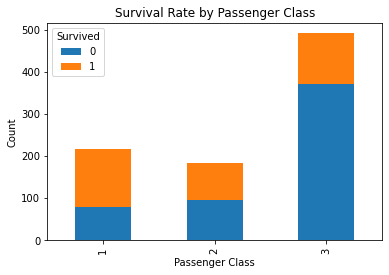

In [11]:
#Visualizing Survival Rate by Passenger Class:
# Create a new DataFrame with only the Pclass and Survived columns and remove null values
pclass_df = titanic_df.select('Pclass', 'Survived').na.drop()

# Group by Pclass and count the number of survivors/non-survivors
grouped_df = pclass_df.groupBy('Pclass', 'Survived').count()

# Convert the DataFrame to a Pandas DataFrame for plotting
pandas_df = grouped_df.toPandas()

# Create a stacked bar chart
pandas_df.pivot(index='Pclass', columns='Survived', values='count').plot(kind='bar', stacked=True)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [12]:
#Calculate the survival rate by class and gender:
titanic_df.groupBy(['pclass', 'sex']).agg(avg('Survived').alias('survival_rate')).show()

+------+------+-------------------+
|pclass|   sex|      survival_rate|
+------+------+-------------------+
|     2|female| 0.9210526315789473|
|     3|  male|0.13544668587896252|
|     1|  male|0.36885245901639346|
|     3|female|                0.5|
|     1|female| 0.9680851063829787|
|     2|  male| 0.1574074074074074|
+------+------+-------------------+



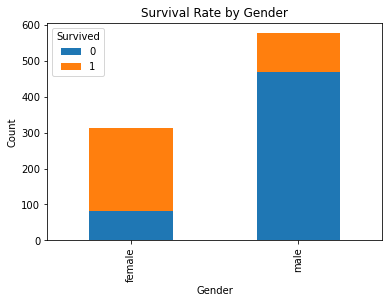

In [13]:
#Visualizing Survival Rate by Gender
# Create a new DataFrame with only the Sex and Survived columns and remove null values
gender_df = titanic_df.select('Sex', 'Survived').na.drop()

# Group by Sex and count the number of survivors/non-survivors
grouped_df = gender_df.groupBy('Sex', 'Survived').count()

# Convert the DataFrame to a Pandas DataFrame for plotting
pandas_df = grouped_df.toPandas()

# Create a stacked bar chart
pandas_df.pivot(index='Sex', columns='Survived', values='count').plot(kind='bar', stacked=True)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [14]:
# Survival rate by age group:
from pyspark.sql.functions import when
titanic_df.select('age', 'Survived').withColumn('age_group', when(titanic_df.Age < 18, 'child').otherwise('adult')).groupBy('age_group').agg(avg('survived').alias('survival_rate')).show()

+---------+-------------------+
|age_group|      survival_rate|
+---------+-------------------+
|    adult|0.36118251928020567|
|    child| 0.5398230088495575|
+---------+-------------------+



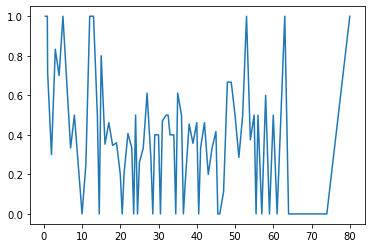

In [15]:
#Visualize the survival rate by age using a line chart:
age_survival_rates = titanic_df.select('age', 'survived').groupBy('age').agg(avg('survived').alias('survival_rate')).orderBy('age').rdd.collect()
x = [row['age'] for row in age_survival_rates]
y = [row['survival_rate'] for row in age_survival_rates]
plt.plot(x, y)
plt.show()

In [16]:
#Count the number of passengers by embarkation port:
titanic_df.groupBy('embarked').agg(count('passengerid').alias('count')).show()

+--------+-----+
|embarked|count|
+--------+-----+
|       Q|   77|
|    null|    2|
|       C|  168|
|       S|  644|
+--------+-----+



# Conclusion:
In conclusion, PySpark provides a powerful framework for performing queries on big data sets. Some key points to keep in mind when working with PySpark include understanding the Spark architecture, using DataFrame and SQL APIs for querying, optimizing performance with caching and partitioning, and monitoring job progress with Spark UI.